In [1]:
import SimpleITK as sitk 
import numpy as np 
import csv 
import shutil
import os

from library_dicom.dicom_processor.tools.create_mip import *
from library_dicom.dicom_processor.tools.folders import *

In [2]:
csv_path = '/media/oncopole/DD 2To/SEGMENTATION/inference/inference_dataset_V4.csv'
with open(csv_path, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    dataset = []
    for row in reader :
        dataset.append(row)
        
del dataset[0] #enlever première ligne

In [3]:
dataset[-1]

['13014107173001',
 '13014107173001',
 '1.2.276.0.7230010.3.1.2.413926400.1.1606388548.351723',
 'pvab',
 'media/oncopole/83c5223d-7a01-4ed0-b268-b877a7da96e2/PVAB_NIFTI/13014107173001/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606388548.351723_nifti_CT.nii',
 'media/oncopole/83c5223d-7a01-4ed0-b268-b877a7da96e2/PVAB_NIFTI/13014107173001/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606388548.351723_nifti_PT.nii',
 'media/oncopole/83c5223d-7a01-4ed0-b268-b877a7da96e2/PVAB_NIFTI/13014107173001/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606388548.351723_nifti_mask_3d.nii']

In [4]:
dataset[0]

['53011101841003',
 '53011101841003',
 '1.2.250.1.199.10.90001.93080.20120515093605',
 'ahl',
 '/media/oncopole/DDArchive/AHL_NIFTI/53011101841003/pet0/1.2.250.1.199.10.90001.93080.20120515093605_nifti_CT.nii',
 '/media/oncopole/DDArchive/AHL_NIFTI/53011101841003/pet0/1.2.250.1.199.10.90001.93080.20120515093605_nifti_PT.nii',
 '/media/oncopole/DDArchive/AHL_NIFTI/53011101841003/pet0/1.2.250.1.199.10.90001.93080.20120515093605_nifti_mask_3d.nii']

In [4]:
for patient in dataset : 
    if 'pvab' in patient : 
        mask_path = patient[-1]
        #print(mask_path)
        pet_path = patient[-2]
        ct_path = patient[-3]
        new_mask_path = mask_path.replace('media/oncopole/83c5223d-7a01-4ed0-b268-b877a7da96e2', '/media/oncopole/DDArchive')
        #print(new_mask_path)
        new_pet_path = pet_path.replace('media/oncopole/83c5223d-7a01-4ed0-b268-b877a7da96e2', '/media/oncopole/DDArchive')
        new_ct_path = ct_path.replace('media/oncopole/83c5223d-7a01-4ed0-b268-b877a7da96e2', '/media/oncopole/DDArchive')
        patient[-1]= new_mask_path 
        patient[-2] = new_pet_path
        patient[-3] = new_ct_path
dataset[-1]

['13014107173001',
 '13014107173001',
 '1.2.276.0.7230010.3.1.2.413926400.1.1606388548.351723',
 'pvab',
 '/media/oncopole/DDArchive/PVAB_NIFTI/13014107173001/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606388548.351723_nifti_CT.nii',
 '/media/oncopole/DDArchive/PVAB_NIFTI/13014107173001/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606388548.351723_nifti_PT.nii',
 '/media/oncopole/DDArchive/PVAB_NIFTI/13014107173001/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606388548.351723_nifti_mask_3d.nii']

In [5]:
directory = '/media/oncopole/DD 2To/SEGMENTATION/inference'
filename = 'inference_dataset_V5.csv'

with open(os.path.join(directory, filename), 'w') as csv_file : 
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["PATIENT_NAME", "patient_id", "study_id", "study", "ct_img", "pet_img", "mask_img"])
    for serie in dataset: 
        csv_writer.writerow([serie[0], serie[1], serie[2], serie[3], serie[4], serie[5], serie[6]])

In [3]:
dataset[63]

['13014101873001',
 '13014101873001',
 '1.2.276.0.7230010.3.1.2.380371712.1.1605521279.787203',
 'PET0',
 '/media/oncopole/LACIE SHARE/PVAB/NIFTI/13014101873001/PET0/1.2.276.0.7230010.3.1.2.380371712.1.1605521279.787203_nifti_CT.nii',
 '/media/oncopole/LACIE SHARE/PVAB/NIFTI/13014101873001/PET0/1.2.276.0.7230010.3.1.2.380371712.1.1605521279.787203_nifti_PT.nii',
 '/media/oncopole/LACIE SHARE/PVAB/NIFTI/13014101873001/PET0/1.2.276.0.7230010.3.1.2.380371712.1.1605521279.787203_nifti_mask.nii',
 'pvab']

In [4]:
dataset[65]

['13014101873003',
 '13014101873003',
 '1.2.276.0.7230010.3.1.2.380371712.1.1605539762.798561',
 'PET0',
 '/media/oncopole/LACIE SHARE/PVAB/NIFTI/13014101873003/PET0/1.2.276.0.7230010.3.1.2.380371712.1.1605539762.798561_nifti_CT.nii',
 '/media/oncopole/LACIE SHARE/PVAB/NIFTI/13014101873003/PET0/1.2.276.0.7230010.3.1.2.380371712.1.1605539762.798561_nifti_PT.nii',
 '/media/oncopole/LACIE SHARE/PVAB/NIFTI/13014101873003/PET0/1.2.276.0.7230010.3.1.2.380371712.1.1605539762.798561_nifti_mask.nii',
 'pvab']

In [5]:
for patient in dataset : 
    mask_path = patient[-2]
    #pet_path = patient[-3]
    #ct_path = patient[-4]
    new_mask_path = mask_path.replace('/media/oncopole/LACIE SHARE/PVAB/NIFTI', '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/pvab')
    #new_pet_path = pet_path.replace('/media/oncopole/LACIE SHARE', '/media/oncopole/DDArchive')
    #new_ct_path = ct_path.replace('/media/oncopole/LACIE SHARE', '/media/oncopole/DDArchive')
    patient[-2]= new_mask_path 
    #patient[-3] = new_pet_path
    #patient[-4] = new_ct_path
dataset[0]

['13014101023001',
 '13014101023001',
 '1.2.276.0.7230010.3.1.2.380371712.1.1605271362.777715',
 'PET0',
 '/media/oncopole/LACIE SHARE/PVAB/NIFTI/13014101023001/PET0/1.2.276.0.7230010.3.1.2.380371712.1.1605271362.777715_nifti_CT.nii',
 '/media/oncopole/LACIE SHARE/PVAB/NIFTI/13014101023001/PET0/1.2.276.0.7230010.3.1.2.380371712.1.1605271362.777715_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/pvab/13014101023001/PET0/1.2.276.0.7230010.3.1.2.380371712.1.1605271362.777715_nifti_mask.nii',
 'pvab']

In [15]:
len(dataset)

76

In [6]:
for patient in dataset[63:64] : 
    print(dataset.index(patient))
    print(patient[-1])
    print(patient[0])
    mask_path = patient[-2]
    mask_img = sitk.ReadImage(mask_path)
    #mask_4D_root = os.path.join('/media/oncopole/d508267f-cc7d-45e2-ae24-9456e005a01f/MASK_4D', patient[-1])
    #if not os.path.exists(mask_4D_root):
     #   os.makedirs(mask_4D_root)
    mask_array = sitk.GetArrayFromImage(mask_img)

    if len(mask_array.shape) == 3 : 
        spacing = mask_img.GetSpacing()
        direction =  mask_img.GetDirection()
        origin = mask_img.GetOrigin()

        mask_array = sitk.GetArrayFromImage(mask_img).astype(np.uint8)
        #print("Size array :", mask_array.shape)
        mask_array = np.expand_dims(mask_array, axis=-1)
        sitk_img = sitk.GetImageFromArray(mask_array, isVector = True)
        sitk_img = sitk.Cast(sitk_img, sitk.sitkVectorUInt8)
        sitk_img.SetSpacing(spacing)
        sitk_img.SetOrigin(origin)
        sitk_img.SetDirection(direction)
        root = '/'.join(mask_path.split('/')[:-1])
        #print(root)
        filename = mask_path.split('/')[-1]
        filename =  filename.replace('mask', 'mask_3d')
        #print(filename)
        sitk.WriteImage(sitk_img, os.path.join(root, filename))
        print('NEW NIFTI MASK DONE')
        #patient.append(os.path.join(root, filename))
        #shutil.move(mask_path, os.path.join(mask_4D_root, mask_path.split('/')[-1]))
        #os.rename(mask_path, os.path.join(mask_4D_root, mask_path.split('/')[-1]))




    else : #4D
        spacing = mask_img.GetSpacing()[:-1]
        direction =  tuple(el for i, el in enumerate(mask_img.GetDirection()[:12]) if not (i + 1) % 4 == 0)
        origin = mask_img.GetOrigin()[:-1]

        #print("Size mask_img before :", mask_img.GetSize())
        mask_array = sitk.GetArrayFromImage(mask_img).astype(np.uint8)

        #print("Size array :", mask_array.shape)
        mask_array = np.transpose(mask_array, (1,2,3,0)).astype(np.uint8)

        
        #write sitk image 
        sitk_img = sitk.GetImageFromArray(mask_array, isVector = True)
        sitk_img = sitk.Cast(sitk_img, sitk.sitkVectorUInt8)
        sitk_img.SetSpacing(spacing)
        sitk_img.SetOrigin(origin)
        sitk_img.SetDirection(direction)
        root = '/'.join(mask_path.split('/')[:-1])
        #print(root)
        filename = mask_path.split('/')[-1]
        filename =  filename.replace('mask', 'mask_3d')
        #print(filename)
        sitk.WriteImage(sitk_img, os.path.join(root, filename))
        #patient.append(os.path.join(root, filename))
        print('NEW NIFTI MASK DONE')
        #shutil.move(mask_path, os.path.join(mask_4D_root, mask_path.split('/')[-1]))
        #os.rename(mask_path, os.path.join(mask_4D_root, mask_path.split('/')[-1]))

63
pvab
13014101873001


In [ ]:
directory = '/media/oncopole/DDArchive/PVAB/NIFTI'
filename = 'PVAB_NIFTI_v3.csv'

with open(os.path.join(directory, filename), 'w') as csv_file : 
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["PATIENT_ID", "STUDY UID", "PET", "NIFTI_CT", "NIFTI_PET", "NIFTI_MASK", "NIFTI_MASK_3D" ,"STUDY"])
    for serie in dataset: 
        csv_writer.writerow([serie[0], serie[1], serie[2], serie[3], serie[4], serie[5], serie[-1], serie[-2]])

In [ ]:
a

In [15]:
path = dataset[0][-2]

img = sitk.ReadImage(path)
print(img.GetSize())
array = sitk.GetArrayFromImage(img)
print(array.shape)
transpose = np.transpose(array)
print(transpose.shape)

(256, 256, 299, 18)
(18, 299, 256, 256)
(256, 256, 299, 18)


Size mask_img before : (200, 200, 215, 15)
Size array : (15, 215, 200, 200)
size array after transpose :  (215, 200, 200, 15)


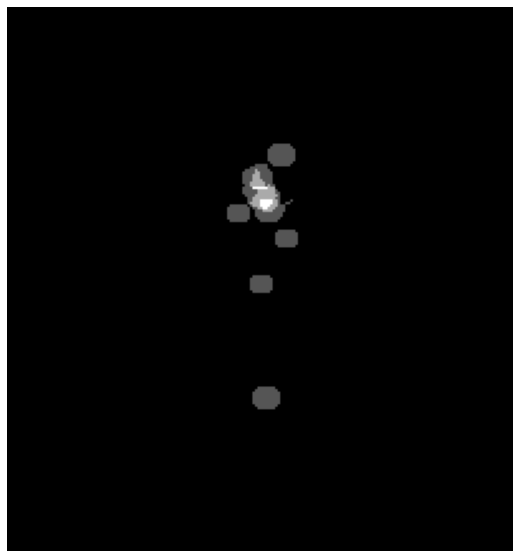

In [25]:
mask_4D_path = '/media/oncopole/DDArchive/PVAB/NIFTI/13014101033001/PET0/1.2.276.0.7230010.3.1.2.413926400.1.1606819404.389717_nifti_mask.nii'
mask_3D_path = '/media/oncopole/DDArchive/PVAB/tes_pyradiomics_ok/1.2.276.0.7230010.3.1.2.413926400.1.1606819404.389717_nifti_mask.nii'
filename = '/media/oncopole/DDArchive/test.nii'

mask_path = mask_4D_path
mask_img = sitk.ReadImage(mask_path)
spacing = mask_img.GetSpacing()[:-1]
direction =  tuple(el for i, el in enumerate(mask_img.GetDirection()[:12]) if not (i + 1) % 4 == 0)
origin = mask_img.GetOrigin()[:-1]
    #print(spacing)
    #print(direction)
    #print(origin)
print("Size mask_img before :", mask_img.GetSize())
mask_array = sitk.GetArrayFromImage(mask_img)
print("Size array :", mask_array.shape)
transpose = np.transpose(mask_array, (1, 2, 3, 0))
print("size array after transpose : ", transpose.shape)

sitk_img = sitk.GetImageFromArray(transpose, isVector = True)
sitk_img.SetSpacing(spacing)
sitk_img.SetOrigin(origin)
sitk_img.SetDirection(direction)
sitk.WriteImage(sitk_img, filename)







mask = np.sum(transpose, axis=-1)
mip_imshow(mask.transpose(), angle=0, type='mask', cmap='gray', vmin=0, vmax=10)